In [1]:
import pandas as pd
import numpy as np


In [2]:
covid_word = pd.read_csv('../input/covidowid/owid-covid-data.csv')
covid_word

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159316,ZWE,Africa,Zimbabwe,2022-01-30,229460.0,45.0,172.286,5337.0,4.0,6.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
159317,ZWE,Africa,Zimbabwe,2022-01-31,229666.0,206.0,160.714,5338.0,1.0,4.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
159318,ZWE,Africa,Zimbabwe,2022-02-01,229851.0,185.0,153.571,5350.0,12.0,4.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
159319,ZWE,Africa,Zimbabwe,2022-02-02,230012.0,161.0,152.714,5352.0,2.0,4.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


Let's study our DataSet. As you can see, it consist of 159321 rows × 67 columns. There is some missing data are observed in the DataSet. We should be sure that Python recognized types of data correctly.


In [3]:
covid_word.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159321 entries, 0 to 159320
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    159321 non-null  object 
 1   continent                                   149755 non-null  object 
 2   location                                    159321 non-null  object 
 3   date                                        159321 non-null  object 
 4   total_cases                                 156450 non-null  float64
 5   new_cases                                   156400 non-null  float64
 6   new_cases_smoothed                          155249 non-null  float64
 7   total_deaths                                138892 non-null  float64
 8   new_deaths                                  139060 non-null  float64
 9   new_deaths_smoothed                         138930 non-null  float64
 

As you can see, 66 columns of COVID-19 data were recognized correctly (float64). First 4 columns and tests_units were recognized as objects. Let's investigate them:


In [4]:
fields = ['iso_code', 'continent', 'location', 'tests_units']
covid_word[fields]

,iso_code,continent,location,tests_units
0,AFG,Asia,Afghanistan,NaN
1,AFG,Asia,Afghanistan,NaN
2,AFG,Asia,Afghanistan,NaN
3,AFG,Asia,Afghanistan,NaN
4,AFG,Asia,Afghanistan,NaN
...,...,...,...,...
159316,ZWE,Africa,Zimbabwe,tests performed
159317,ZWE,Africa,Zimbabwe,tests performed
159318,ZWE,Africa,Zimbabwe,NaN
159319,ZWE,Africa,Zimbabwe,NaN


Let's show information about the field date.


In [5]:
covid_word['date']

0         2020-02-24
1         2020-02-25
2         2020-02-26
3         2020-02-27
4         2020-02-28
             ...    
159316    2022-01-30
159317    2022-01-31
159318    2022-02-01
159319    2022-02-02
159320    2022-02-03
Name: date, Length: 159321, dtype: object

### Сhange the data types of columns


As you can see, the columns: 'iso_code', 'continent', 'location', 'tests_units' have many repetitions and should be assigned to categorical fields **pandas.astype()**. 

The field 'data' should be converted into DataTime type **pandas.to_datetime**  
To see the results we can use **pandas.describe()**.


In [6]:
fields = ['iso_code', 'continent', 'location', 'tests_units']
covid_word[fields] =covid_word[fields].astype('category')
covid_word.loc[:, 'date'] = pd.to_datetime(covid_word['date'])
covid_word[fields].describe()

,iso_code,continent,location,tests_units
count,159321,149755,159321,82578
unique,238,6,238,4
top,PER,Africa,Mexico,tests performed
freq,765,37767,765,57552


### Rows filtering


As we can see, the DataSet contains information about 6 continents and 238 countries.
The field 'tests_units' consist of 4 categories. To show a list of countries, we can use **pandas.Series.cat.categories**.


In [7]:
covid_word['location'].cat.categories

Index(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Uzbekistan', 'Vanuatu', 'Vatican', 'Venezuela', 'Vietnam',
       'Wallis and Futuna', 'World', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=238)

Let's investigate the dynamics of new cases of COVID-19 for a separate country. We will use India for saving models and further forecast. You can use your country. Let's use a pandas filter to do this.


In [8]:

c_covid = covid_word[covid_word['location'] == "India"]
c_covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
66772,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
66773,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
66774,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
66775,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
66776,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67503,IND,Asia,India,2022-01-30,41302440.0,209918.0,251301.714,495050.0,959.0,743.143,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
67504,IND,Asia,India,2022-01-31,41469499.0,167059.0,238613.857,496242.0,1192.0,825.714,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
67505,IND,Asia,India,2022-02-01,41630885.0,161386.0,220824.143,497975.0,1733.0,978.286,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
67506,IND,Asia,India,2022-02-02,41803318.0,172433.0,204545.429,498983.0,1008.0,1040.429,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN


Let's choose the fields 'new_cases', 'new_cases_smoothed' for forecasting. First of all, we should visualize this data.


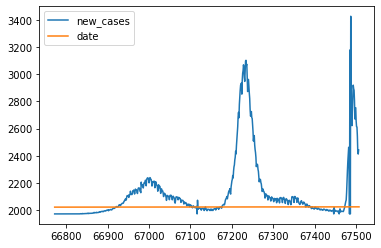

In [9]:
import matplotlib.pyplot as plt
fields = ['new_cases', 'date']
c_covid[fields].plot()
plt.show()

### Elimination of missing data


As you can see, there are large fluctuations in the new cases plot. Let's try to make a forecast for these waves.
First of all, we should delete missing data using **pandas.DataFrame.dropna()**


In [10]:
c_covid = c_covid[fields].dropna()
c_covid

,new_cases,date
66772,1.0,2020-01-30
66773,0.0,2020-01-31
66774,0.0,2020-02-01
66775,1.0,2020-02-02
66776,1.0,2020-02-03
...,...,...
67502,234281.0,2022-01-29
67503,209918.0,2022-01-30
67504,167059.0,2022-01-31
67505,161386.0,2022-02-01


### Data transformation


 To check for dependencies, it is necessary to perform a correlation analysis between them. This requires:

1.  duplicating of data and moving it vertically down for a certain number of days (lag)
2.  deleting the missing data at the beginning and end **pandas.DataFrame.shift()**
3.  calculating the correlation coefficient between the obtained series.

It is convenient to create a separate function for lag:


In [11]:
def lag_correlation_ts(y, x, lag):
    """
   
    y: fixed
    x: shifted
    lag: lag for shifting
    r: DataFrame of lags correlation coefficients
    """
    r = [0] * (lag + 1)
    y = y.copy()
    x = x.copy()
    y.name = "y"
    x.name = "x"

    for i in range(0, lag + 1):
        ds = y.copy().to_frame()
        ds = ds.join(x.shift(i), how='outer')
        r[i] = ds.corr().values[0][1]
    r = pd.DataFrame(r)
    r.index.names = ['Lag']
    r.columns = ['Correlation']
    return r

Let's create a target DataSet.


In [12]:
y_dataset = c_covid[['new_cases','date']]
y_dataset

,new_cases,date
66772,1.0,2020-01-30
66773,0.0,2020-01-31
66774,0.0,2020-02-01
66775,1.0,2020-02-02
66776,1.0,2020-02-03
...,...,...
67502,234281.0,2022-01-29
67503,209918.0,2022-01-30
67504,167059.0,2022-01-31
67505,161386.0,2022-02-01


# Phophet

In [13]:
from fbprophet import Prophet

In [14]:
fb_confirm = y_dataset.rename(columns={'date': 'ds',
                        'new_cases': 'y'})

fb_confirm.head()

,y,ds
66772,1.0,2020-01-30
66773,0.0,2020-01-31
66774,0.0,2020-02-01
66775,1.0,2020-02-02
66776,1.0,2020-02-03


In [15]:
# evaluate prophet time series forecasting model on hold out dataset
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
# load data
df=fb_confirm
m = Prophet()
m.fit(df)

Initial log joint probability = -12.5915
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1232.22    0.00453722        58.369           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1285.22     0.0033502       207.829      0.4146      0.4146      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1288.63   5.62215e-05       63.7133           1           1      359   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     374       1288.76   1.36046e-05       54.5118   1.751e-07       0.001      496  LS failed, Hessian reset 
     399       1288.77   7.41873e-06       82.5854      0.8735      0.2716      530   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1290.04      0.037932    

terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [16]:
future = m.make_future_dataframe(periods= 14, freq='D')
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail()
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-30,80958.628479,-14806.033533,93045.928062,80958.628479,80958.628479,-41739.302523,-41739.302523,-41739.302523,-98.283744,-98.283744,-98.283744,-41641.018779,-41641.018779,-41641.018779,0.0,0.0,0.0,39219.325955
1,2020-01-31,78990.573229,-18364.283674,93042.074043,78990.573229,78990.573229,-41920.773740,-41920.773740,-41920.773740,4531.581056,4531.581056,4531.581056,-46452.354796,-46452.354796,-46452.354796,0.0,0.0,0.0,37069.799489
2,2020-02-01,77022.517979,-24611.323335,81987.301160,77022.517979,77022.517979,-49240.902427,-49240.902427,-49240.902427,1988.238652,1988.238652,1988.238652,-51229.141079,-51229.141079,-51229.141079,0.0,0.0,0.0,27781.615552
3,2020-02-02,75054.462730,-33887.910933,67156.669748,75054.462730,75054.462730,-56565.364360,-56565.364360,-56565.364360,-683.786577,-683.786577,-683.786577,-55881.577783,-55881.577783,-55881.577783,0.0,0.0,0.0,18489.098370
4,2020-02-03,73086.407480,-52534.118712,55047.249484,73086.407480,73086.407480,-67730.877203,-67730.877203,-67730.877203,-7405.437960,-7405.437960,-7405.437960,-60325.439243,-60325.439243,-60325.439243,0.0,0.0,0.0,5355.530277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,2022-02-12,250379.216742,115678.578346,225834.222561,249910.015928,250685.435741,-79409.441544,-79409.441544,-79409.441544,1988.238652,1988.238652,1988.238652,-81397.680196,-81397.680196,-81397.680196,0.0,0.0,0.0,170969.775198
745,2022-02-13,251956.328478,115621.475145,224757.565538,251262.453935,252454.752543,-81619.860189,-81619.860189,-81619.860189,-683.786577,-683.786577,-683.786577,-80936.073612,-80936.073612,-80936.073612,0.0,0.0,0.0,170336.468289
746,2022-02-14,253533.440215,113212.569391,218506.907144,252606.288561,254231.575652,-87412.779907,-87412.779907,-87412.779907,-7405.437960,-7405.437960,-7405.437960,-80007.341948,-80007.341948,-80007.341948,0.0,0.0,0.0,166120.660307
747,2022-02-15,255110.551951,118436.344048,225020.160046,254099.625495,256029.837005,-81978.981064,-81978.981064,-81978.981064,-3327.167798,-3327.167798,-3327.167798,-78651.813266,-78651.813266,-78651.813266,0.0,0.0,0.0,173131.570887


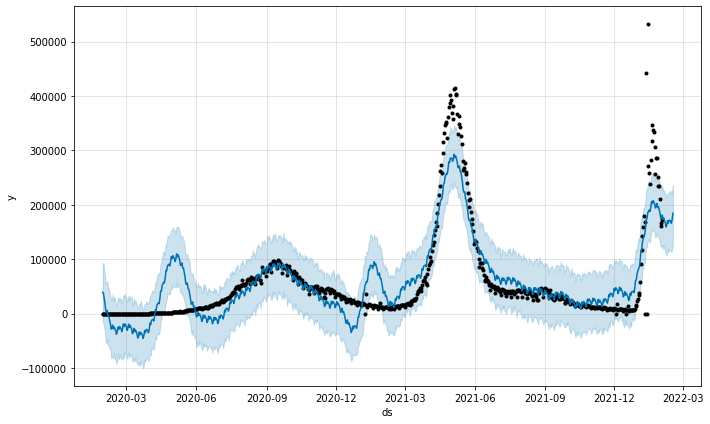

In [17]:
fig1 = m.plot(forecast)

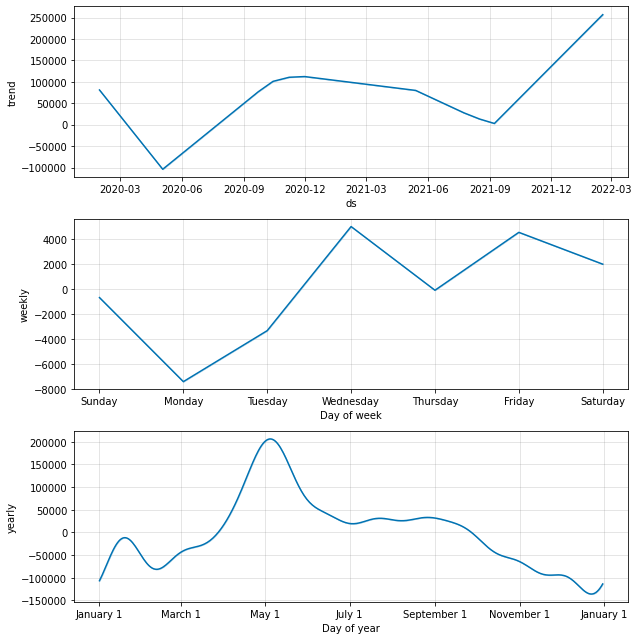

In [18]:
fig2 = m.plot_components(forecast)

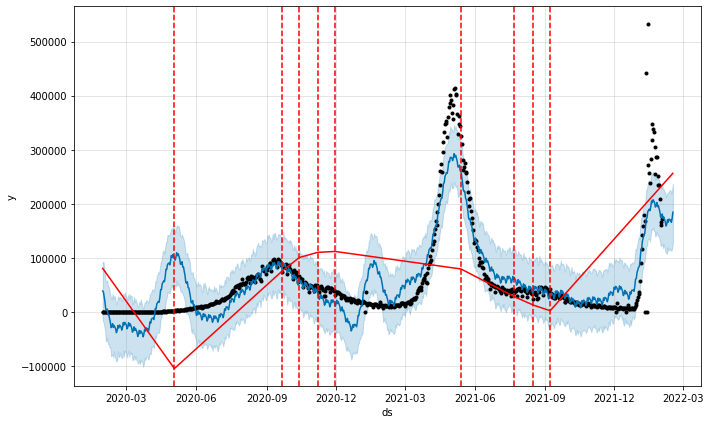

In [19]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)